In [1]:
from main import * 

filename = "feature_df_py.xlsx"  # df of files and factors

color_dict = {"pAD":"orange","Somatic":"blue","WASH":"lightsteelblue", "PRE":"black", "CONTROL": 'grey', "TCB2":'green', "DMT":"teal", "PSIL":"orange", "LSD":"purple", "MDL":'blue', 'I_display':'cornflowerblue'} 
saveColors(filename, color_dict) #cache colors relative to filename


COLORS {'pAD': 'orange', 'Somatic': 'blue', 'WASH': 'lightsteelblue', 'PRE': 'black', 'CONTROL': 'grey', 'TCB2': 'green', 'DMT': 'teal', 'PSIL': 'orange', 'LSD': 'purple', 'MDL': 'blue', 'I_display': 'cornflowerblue'} SAVED TO /Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py SUBCACHE


In [ ]:
#check a specific file I and V plot
quick_plot_file(filename, 'JJB230911/t31')


In [5]:
# FEATURE DF --> EXPANDED DF

# subselect by cell type
# df = getExpandedSubsetDf(filename, 'L5a_TLX', from_scratch=True)

# complete
df = getExpandedDf(filename)          #if cached will just get delete cache to redo

# df[df['data_type']== 'FP'][['cell_id', 'data_type','WASH_Somatic_AP_locs', 'APP_pAD_AP_locs', 'AP_height']]
#show APP traces without AP's
# df[df['AP_locs'].apply(lambda x: isinstance(x, np.ndarray) and len(x) == 0 if isinstance(x, np.ndarray) else False)]

/Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/expanded_df.pkl
GETTING "expanded_df" FROM "feature_df_py" CACHE


,folder_file,cell_id,data_type,drug,conc_uM,replication_no,application_order,drug_in,drug_out,I_set,...,PRE_pAD_AP_locs,AP_slope,AP_latency,sag,AP_width,AP_height,FI_slope,rheobased_threshold,voltage_threshold,error
0,JJB210406/t8,CTG210406a,FP,PRE,NaN,1,0,NaN,NaN,NaN,...,NaN,"[88.85249328613281, 89.65687561035156, 80.7468...","[1.0, 1.0, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.2]","[[0.06721071, -88.160126, 100.0, -73.1248], [0...","[1.9, 217.3, 461.0, 655.6, 892.9, 1111.9, 1336...","[88.85249, 89.656876, 88.82156, 90.05907, 90.2...",0.400000,77.500000,"[-42.3225, -42.8175, -42.786564, -44.024063, -...",ran
1,JJB210406/t9,CTG210406a,FP,PRE,NaN,2,0,NaN,NaN,NaN,...,NaN,"[92.13187408447266, 83.33437832919033, 92.1628...","[1.0, 1.1, 1.0, 1.1, 1.1, 1.0, 1.0, 1.0]","[[0.07890445, -88.553925, 100.0, -75.98009], [...","[1.8, 222.6, 479.5, 721.0, 935.8, 1191.6, 1428...","[92.131874, 91.667816, 92.16281, 91.51312, 91....",0.375000,98.222222,"[-42.66281, -42.167812, -42.66281, -42.724686,...",ran
2,JJB210406/t10,CTG210406a,FP,PRE,NaN,3,0,NaN,NaN,NaN,...,NaN,"[92.78156280517578, 84.375, 92.41030883789062,...","[1.0, 1.1, 1.0, 1.0, 1.0, 1.1, 1.1, 1.1, 1.1, ...","[[0.071824215, -88.76183, 100.0, -77.02342], [...","[1.9, 526.9, 948.8, 1.8, 163.6, 320.1, 489.4, ...","[92.78156, 92.8125, 92.41031, 89.19281, 90.739...",0.350000,110.476190,"[-41.301563, -41.672813, -41.765625, -39.69281...",ran
3,JJB210406/t11,CTG210406a,AP,DMT,NaN,1,1,11.0,20.0,holding_I,...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ran
4,JJB210406/t16,CTG210406a,FP,DMT,NaN,1,1,NaN,NaN,NaN,...,NaN,"[90.09687635633681, 79.97343444824219, 87.8624...","[0.9, 1.0, 0.9, 1.0, 0.9]","[[0.060758516, -85.02094, 100.0, -70.78395], [...","[1.5, 283.2, 603.5, 933.7, 1350.7]","[81.08719, 79.973434, 79.07625, 80.80875, 79.9...",0.100000,50.000000,"[-39.3525, -38.115, -37.805626, -38.950314, -3...",ran
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1808,JJB230911/t30,DRD230911d,FP,PRE,NaN,3,0,NaN,NaN,NaN,...,NaN,"[92.90531158447266, 82.23750027743252, 81.0562...","[1.0, 1.1, 1.1, 1.1, 1.2, 1.1]","[[0.15936701, -79.7124, 130.0, -78.85006], [0....","[1.8, 195.0, 410.2, 614.9, 817.8, 1016.8]","[92.90531, 90.46125, 89.16187, 89.06906, 88.41...",0.166667,74.000000,"[-41.115936, -40.095, -39.19781, -40.002186, -...",ran
1809,JJB230911/t31,DRD230911d,AP,LSD_CNQX_AP5,0.18,1,1,22.0,35.0,short step,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ran
1810,JJB230911/t32,DRD230911d,FP,LSD_CNQX_AP5,0.18,1,1,NaN,NaN,NaN,...,NaN,"[76.8374980579723, 75.57187167080966, 68.08827...","[1.1, 1.1, 1.2, 1.2, 1.2]","[[0.096053265, -73.45741, 130.0, -70.922325], ...","[1.6, 239.2, 504.1, 775.8, 1042.5]","[84.52125, 83.12906, 81.70593, 81.427505, 81.6...",0.166667,50.000000,"[-41.45625, -40.8375, -39.878437, -39.38344, -...",ran
1811,JJB230911/t33,DRD230911d,FP,LSD_CNQX_AP5,0.18,2,1,NaN,NaN,NaN,...,NaN,"[79.31250138716264, 76.69687444513494, 76.6406...","[1.1, 1.1, 1.1, 1.1, 1.2, 1.2, 1.2, 1.2, 1.2, ...","[[0.13064161, -72.239815, 130.0, -70.725296], ...","[1.6, 434.5, 905.2, 1.6, 107.0, 248.4, 408.3, ...","[87.24375, 84.36656, 84.30469, 86.40843, 83.62...",0.166667,62.000000,"[-42.075, -40.156876, -40.12594, -42.19875, -4...",ran


In [ ]:
# GENERATE STATS DF APP and FP # missing rnput_R, RMP and tau, sag respectivly
loop_stats(filename)

#BUILD FP HISTOGRAMS #TODO too many prints!
build_FP_figs(filename) #also will getOrBuild insufficient_data_tracking =getOrBuildDataTracking(filename)
build_APP_histogram_figures(filename)


In [ ]:
#APPLICATION TRACE PLOTTING
#FIX ME: allow for second aplication plotting also 


# getorbuildApplicationFig(filename, 'SIM230713a', from_scratch=True) #cell_df_or_id

import numpy as np
import pandas as pd
#loop over all AP files and build from scratch
# loopBuildAplicationFigs(filename) #FIX ME: run out of active memeory

# plot_all_FI_curves(feature_df,  color_dict)  # generates PDF with all FI curves for single cell labed with drug and aplication order #### MAKE HZ NOT APs per sweep also isnt it in pA not nA??
# plot_FI_AP_curves(feature_df) #generated PDF with FI-AP for each cell

def APP_loop_plotter(filename_or_df, getorbuild_plotter_function, from_scratch=True ):

    if not isinstance(filename_or_df, pd.DataFrame):
        expanded_df = getExpandedDf(filename) 
    else:
        filename_or_df=expanded_df
    
    for cell_id in expanded_df['cell_id'].unique(): #loop over all unique cell_ids 
        cell_df = getCellDf(expanded_df, cell_id, data_type = 'AP')
        getorbuild_plotter_function(filename, cell_df, from_scratch=from_scratch) #check use for second aplications in AP_MEan ect

    return

APP_loop_plotter(filename, getorbuildApplicationFig, from_scratch=True)

/Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/L5a_TLX_expanded_df.pkl
GETTING "L5a_TLX_expanded_df" FROM "feature_df_py" CACHE
using suplied expanded df
BUILDING "TLX210328a Mean APs Figure"


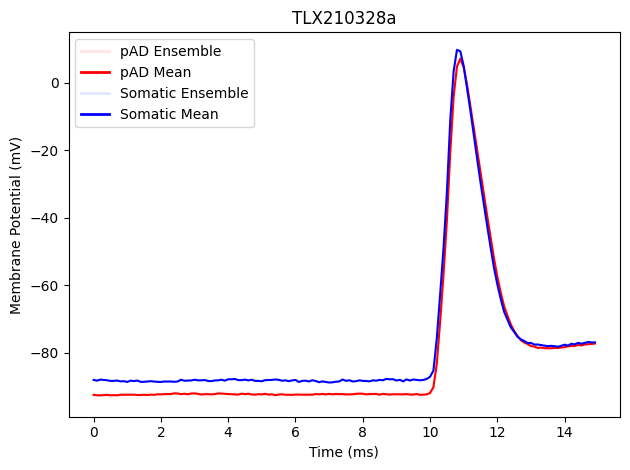

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/Mean_APs/TLX210328a.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/Mean_APs/TLX210328a.png


/Users/jasminebutler/Desktop/IGOR_phd/module/plotters.py:308: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


BUILDING "TLX210328a AP Histogram Figure"


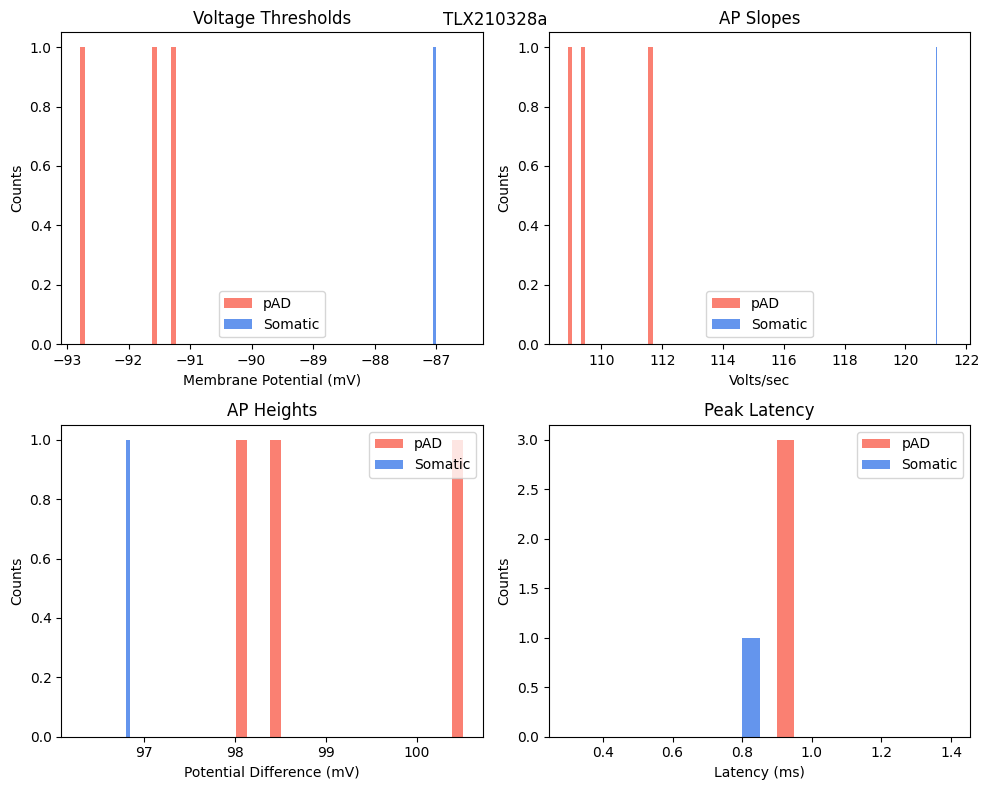

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/Histogram_APs/TLX210328a.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/Histogram_APs/TLX210328a.png


/Users/jasminebutler/Desktop/IGOR_phd/module/plotters.py:378: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


BUILDING "TLX210328a Phase Plot Figure"


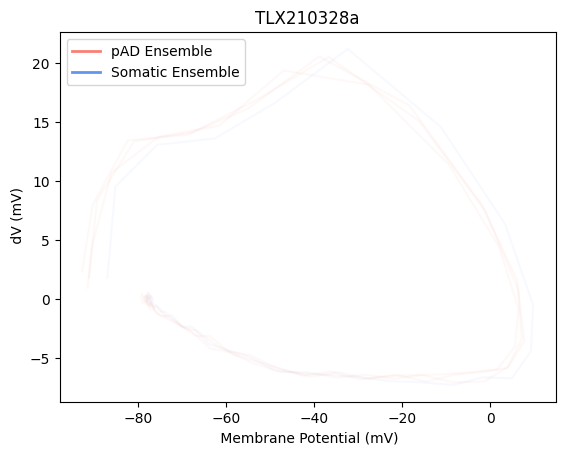

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/PhasePlot_APs/TLX210328a.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/PhasePlot_APs/TLX210328a.png


/Users/jasminebutler/Desktop/IGOR_phd/module/plotters.py:331: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


BUILDING "TLX210328a PCA Figure"


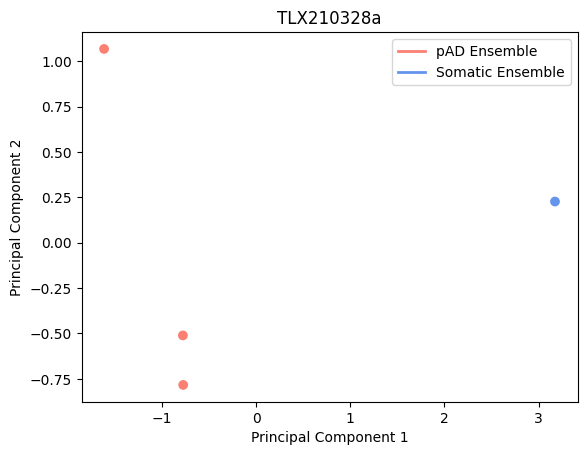

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/PCA_APs/TLX210328a.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/PCA_APs/TLX210328a.png


/Users/jasminebutler/Desktop/IGOR_phd/module/plotters.py:355: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


/Users/jasminebutler/Desktop/IGOR_phd/input/cache/feature_df_py/expanded_df.pkl
GETTING "expanded_df" FROM "feature_df_py" CACHE
using suplied expanded df
BUILDING "TLX210328a Application 1 Figure"


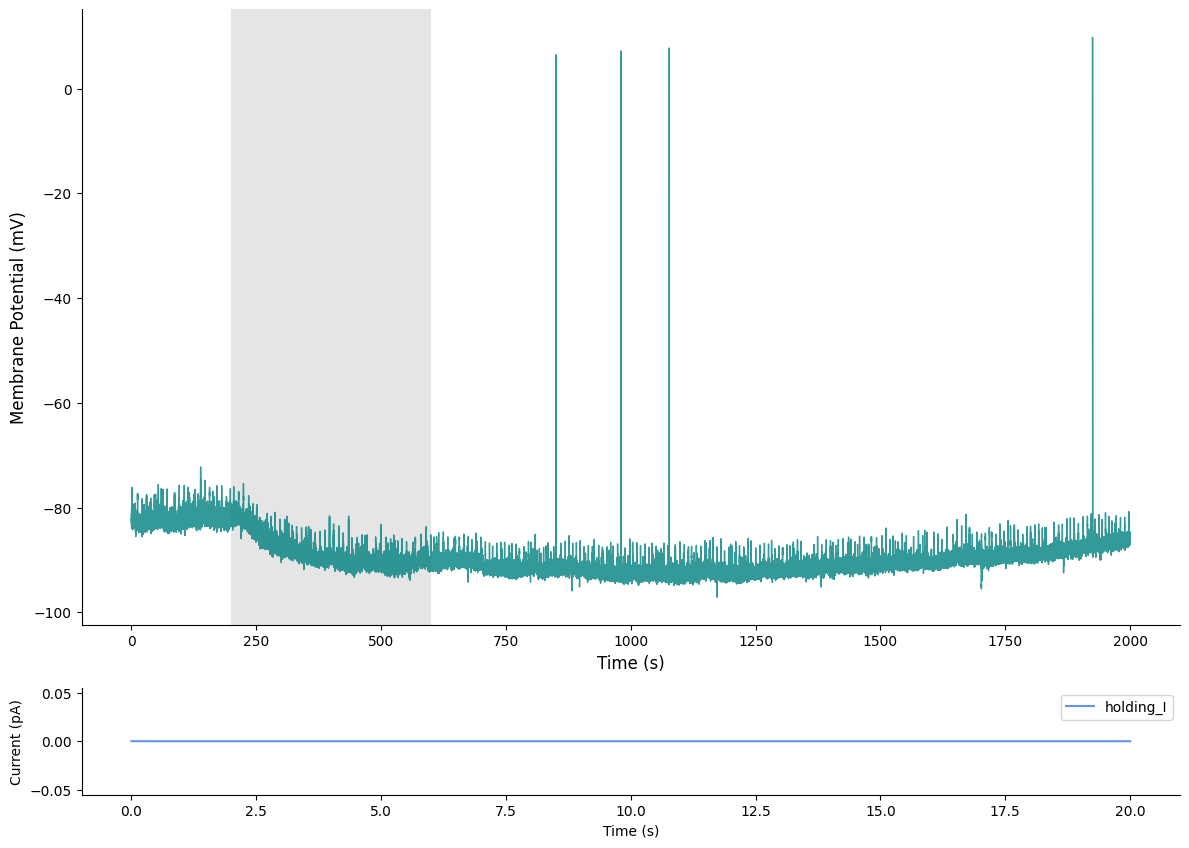

SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/TLX210328a_application_1.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/DrugApplication/TLX210328a_application_1.png


In [4]:
#Action Potential Investigation (AP)

#EXAMPLE USE
cell_type_expanded_df = getExpandedSubsetDf(filename, 'L5a_TLX', from_scratch=False)

cell_df = getCellDf(cell_type_expanded_df, 'TLX210328a', data_type='AP')

getorbuildAP_MeanFig(filename, cell_df, from_scratch=True) 
getorbuildAP_HistogramFig(filename, cell_df, from_scratch=True) 
getorbuildAP_PhasePlotFig(filename, cell_df, from_scratch=True) 
getorbuildAP_PCAFig(filename, cell_df, from_scratch=True) 
getorbuildApplicationFig(filename, 'TLX210328a', from_scratch=True)




In [6]:
#this function is dependant on values from feature_df_expanded
#this will generate all plots that could also be gotten by getorbuildHistogram(finename, identifier) #FIX ME
loop_stats(filename)
#RuntimeWarning: Mean of empty slice. #FIX ME

GETTING "feature_df_expanded" FROM "feature_df_py" CACHE


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jasminebutler/Desktop/IGOR_phd/.v

Insufficient data for L5a_CBLforFiring_(Hz)
Insufficient data for L5a_CBLforVoltage_Threshold_(mV)
Insufficient data for L5a_CBLfor AP_Height_(mV)
Insufficient data for L5a_CBLforAP_slope_(V_s^-1)
Insufficient data for L5a_CBLforAP_width_(s) 
Insufficient data for L5a_CBLforAP_latency_(ms)
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

PRE vs. CONTROL: Custom statistical test, P_val:4.168e-02
PRE vs. TCB2: Custom statistical test, P_val:4.161e-02
PRE vs. LSD: Custom statistical test, P_val:1.977e-03
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L5a_TLX_Firing_(Hz).svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L5a_TLX_Firing_(Hz).png
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

PR

/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/seaborn/categorical.py:1402: UserWarning: You passed a edgecolor/edgecolors ('#4c4c4c') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(cat_pos, swarm_data, s=s, **kws)


SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L5a_TLX_pAD_vs_somatic_APs_LSD.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L5a_TLX_pAD_vs_somatic_APs_LSD.png
Insuficient data for L5a_TLX with MDL application 
Insuficient data for L5a_TLX with PSIL application 


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/seaborn/categorical.py:1402: UserWarning: You passed a edgecolor/edgecolors ('#4c4c4c') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(cat_pos, swarm_data, s=s, **kws)


SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L5a_TLX_pAD_vs_somatic_APs_TCB2.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L5a_TLX_pAD_vs_somatic_APs_TCB2.png
Insuficient data for L5b_CBL with TCB2 application 
Insuficient data for L5b_SIM with CONTROL application 
Insuficient data for L5b_SIM with DMT application 


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/seaborn/categorical.py:1402: UserWarning: You passed a edgecolor/edgecolors ('#4c4c4c') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(cat_pos, swarm_data, s=s, **kws)


SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L5b_SIM_pAD_vs_somatic_APs_LSD.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L5b_SIM_pAD_vs_somatic_APs_LSD.png
Insuficient data for L5b_SIM with PSIL application 


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/seaborn/categorical.py:1402: UserWarning: You passed a edgecolor/edgecolors ('#4c4c4c') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(cat_pos, swarm_data, s=s, **kws)


SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L5b_SIM_pAD_vs_somatic_APs_TCB2.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L5b_SIM_pAD_vs_somatic_APs_TCB2.png
Insuficient data for L5b_int with TCB2 application 
Insuficient data for L6b _DRD with CONTROL application 
Insuficient data for L6b _DRD with LSD application 
Insuficient data for L6b_ with TCB2 application 
Insuficient data for L6b_5HT_ with MDL application 
Insuficient data for L6b_5HT_ with TCB2 application 
Insuficient data for L6b_CTG with CONTROL application 
Insuficient data for L6b_CTG with LSD application 
Insuficient data for L6b_CTG with MDL application 


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/seaborn/categorical.py:1402: UserWarning: You passed a edgecolor/edgecolors ('#4c4c4c') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(cat_pos, swarm_data, s=s, **kws)


SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L6b_CTG_pAD_vs_somatic_APs_TCB2.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L6b_CTG_pAD_vs_somatic_APs_TCB2.png


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/seaborn/categorical.py:1402: UserWarning: You passed a edgecolor/edgecolors ('#4c4c4c') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(cat_pos, swarm_data, s=s, **kws)


SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L6b_DRD_pAD_vs_somatic_APs_CONTROL.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L6b_DRD_pAD_vs_somatic_APs_CONTROL.png


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/seaborn/categorical.py:1402: UserWarning: You passed a edgecolor/edgecolors ('#4c4c4c') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(cat_pos, swarm_data, s=s, **kws)


SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L6b_DRD_pAD_vs_somatic_APs_DMT.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L6b_DRD_pAD_vs_somatic_APs_DMT.png


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/seaborn/categorical.py:1402: UserWarning: You passed a edgecolor/edgecolors ('#4c4c4c') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(cat_pos, swarm_data, s=s, **kws)


SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L6b_DRD_pAD_vs_somatic_APs_LSD.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L6b_DRD_pAD_vs_somatic_APs_LSD.png


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/seaborn/categorical.py:1402: UserWarning: You passed a edgecolor/edgecolors ('#4c4c4c') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(cat_pos, swarm_data, s=s, **kws)


SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L6b_DRD_pAD_vs_somatic_APs_MDL.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L6b_DRD_pAD_vs_somatic_APs_MDL.png
Insuficient data for L6b_DRD with PSIL application 


/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/seaborn/categorical.py:1402: UserWarning: You passed a edgecolor/edgecolors ('#4c4c4c') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(cat_pos, swarm_data, s=s, **kws)
/Users/jasminebutler/Desktop/IGOR_phd/.venv/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L6b_DRD_pAD_vs_somatic_APs_TCB2.svg
SAVED /Users/jasminebutler/Desktop/IGOR_phd/output/FP_Histograms/L6b_DRD_pAD_vs_somatic_APs_TCB2.png


,folder_file,cell_id,data_type,drug,replication_no,application_order,drug_in,drug_out,I_set,R_series,...,mean_AP_slope_file,mean_AP_width_file,mean_AP_latency_file,max_firing_cell_drug,voltage_threshold_cell_drug,AP_height_cell_drug,AP_slope_cell_drug,AP_width_cell_drug,AP_latency_cell_drug,first_drug_AP
906,JJB230509/t11,CBL230509b,FP,PRE,1,0,NaN,NaN,NaN,47.0,...,82.629766,704.375000,0.975000,20.688653,-35.720416,78.239833,86.914814,778.40119,0.904365,TCB2
907,JJB230509/t12,CBL230509b,FP,PRE,2,0,NaN,NaN,NaN,44.0,...,90.947657,841.000000,0.866667,20.688653,-35.720416,78.239833,86.914814,778.40119,0.904365,TCB2
908,JJB230509/t13,CBL230509b,FP,PRE,3,0,NaN,NaN,NaN,44.0,...,87.167019,789.828571,0.871429,20.688653,-35.720416,78.239833,86.914814,778.40119,0.904365,TCB2
905,JJB230509/t8,CBL230509a,AP,TCB2,1,1,21.0,35.0,short step,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
909,JJB230509/t15,CBL230509b,AP,TCB2,1,1,9.0,22.0,short step,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,JJB230126/t42,DRD230126c,FP_AP,WASH,11,1,8.0,NaN,NaN,NaN,...,44.853426,767.400000,1.370000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
443,JJB230126/t43,DRD230126c,FP_AP,WASH,12,1,10.0,NaN,NaN,NaN,...,45.551643,685.200000,1.375000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
724,JJB230301/t19,DRD230301a,FP_AP,WASH,14,1,NaN,NaN,NaN,73.0,...,65.450391,843.366667,1.150000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
725,JJB230301/t20,DRD230301a,FP_AP,WASH,15,1,NaN,NaN,NaN,73.0,...,63.155565,884.650000,1.175000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
